In [1]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

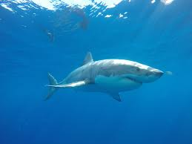

In [3]:
img = PILImage.create("white_shark.jpg")
img.thumbnail((192, 192))
img

In [4]:
#|export
learner = load_learner("export.pkl")

In [5]:
%time learner.predict(img)

CPU times: user 188 ms, sys: 62.5 ms, total: 250 ms
Wall time: 56.3 ms


('white_sh', tensor(2), tensor([0.0093, 0.0136, 0.9771]))

In [6]:
#|export
categories = ("Goldfish", "Tench", "White shark")

def classify_image(img):
    pred, idx, probs = learner.predict(img)
    probs_float = map(float, probs)
    return dict(zip(categories, probs_float))

In [7]:
classify_image(img)

{'Goldfish': 0.009336068294942379,
 'Tench': 0.013567114248871803,
 'White shark': 0.9770968556404114}

In [8]:
#|export
image = gr.inputs.Image(shape= (192, 192))
label = gr.outputs.Label()
examples = ["goldfish.jpg", "tench.jpg", "white_shark.jpg"]

intf = gr.Interface(
    fn = classify_image,
    inputs = image,
    outputs = label,
    examples = examples)
intf.launch(inline= False)

/home/deijauv/venv_cvsion/lib/python3.9/site-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/deijauv/venv_cvsion/lib/python3.9/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/deijauv/venv_cvsion/lib/python3.9/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/deijauv/venv_cvsion/lib/python3.9/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


## export

In [9]:
from nbdev.export import nb_export

In [10]:
nb_export("app.ipynb", "app")